In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# **Data Pre-processing**


In [2]:
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Missing Values**

In [6]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
#drop cabin column
titanic_data = titanic_data.drop(columns = 'Cabin', axis = 1)
titanic_data.shape

(891, 11)

In [8]:
#replacing age column with mean val
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)
titanic_data.isnull().sum()

<ipython-input-8-0498ff41e235>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
#replace missing values in embarked with the mode value
print(titanic_data['Embarked'].mode())
print(titanic_data['Embarked'].mode()[0])

0    S
Name: Embarked, dtype: object
S


In [10]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

<ipython-input-10-bc2b444396f9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [11]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
#data parameters
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Checking Output and its Correlation with Features**

In [13]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

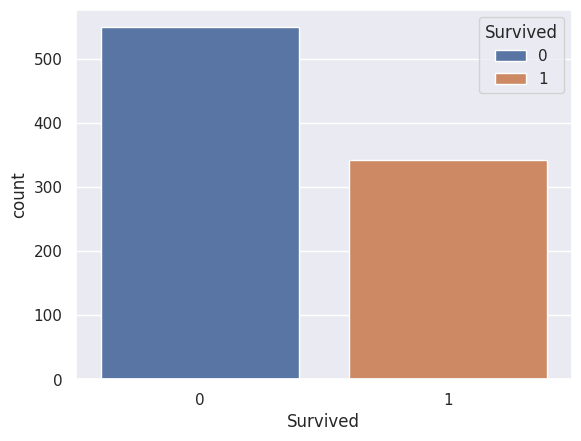

In [14]:
sns.countplot(x = 'Survived', data=titanic_data, hue = 'Survived')

In [15]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


survival based on gender

In [16]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

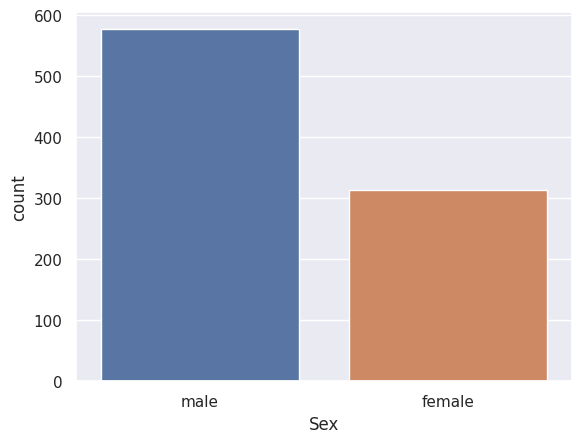

In [17]:
sns.countplot(x = 'Sex', data = titanic_data, hue = 'Sex')

Much more male passengers than female

<Axes: xlabel='Sex', ylabel='count'>

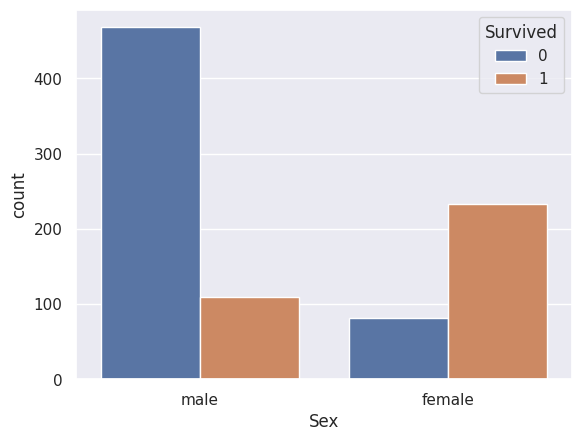

In [18]:
sns.countplot(x = 'Sex', data=titanic_data, hue = 'Survived')

Interestingly, more female passengers were likely to have survived; even though they had been less in number

**Survival based on passenger class**

In [19]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Pclass', ylabel='count'>

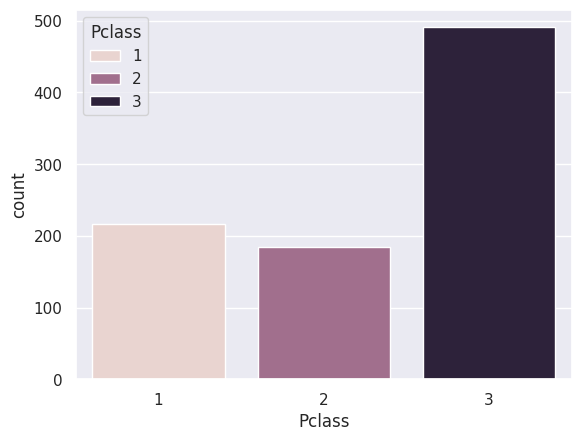

In [20]:
sns.countplot(x = 'Pclass', data = titanic_data, hue = 'Pclass')

Here, the most passengers were in 3rd class

<Axes: xlabel='Pclass', ylabel='count'>

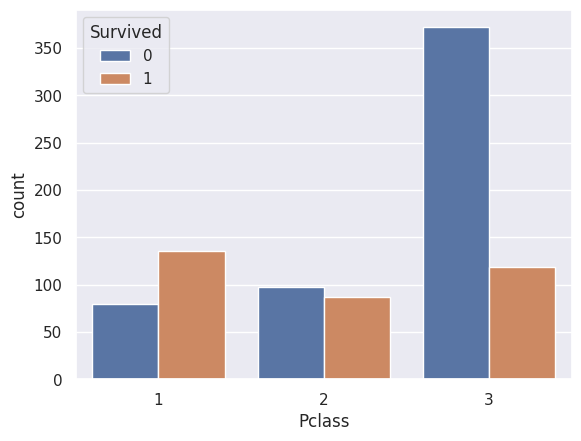

In [21]:
sns.countplot(x = 'Pclass', data = titanic_data, hue = 'Survived')

Notably, 1st class passengers survived more than 3rd class, even though there were more passengers in the 3rd class

**Survival based on Embarked location**

In [22]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


<Axes: xlabel='Embarked', ylabel='count'>

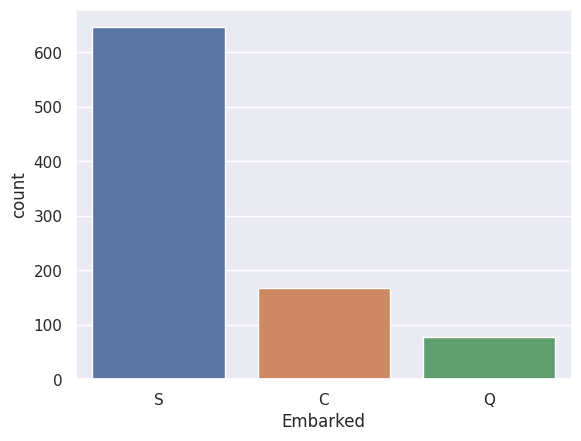

In [23]:
sns.countplot(x = 'Embarked', data = titanic_data, hue = 'Embarked')

<Axes: xlabel='Embarked', ylabel='count'>

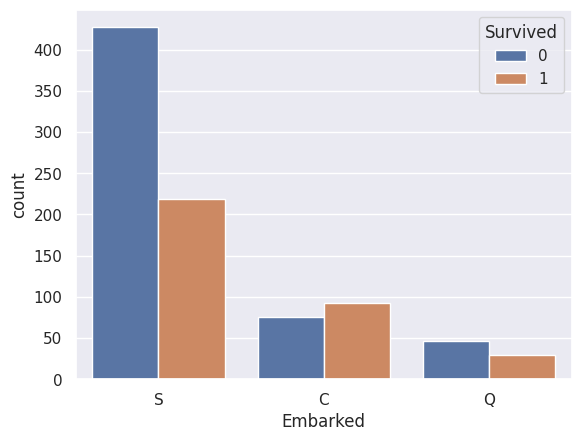

In [24]:
sns.countplot(x = 'Embarked', data = titanic_data, hue = 'Survived')

Most passengers were embarking on S (southampton), therefore the most survivors are from S. Which is also the reason most passengers that did not survive were also embarking on S as well.

# **Encoding**


There are three columns with categorical values that can be used to predict whether or not the passengers would survive:

(i) Sex

(ii) Pclass

(iii) Embark


As Pclass already have values in numbers, we need to encode the values in Sex and Embark to numbers as well in order to create our model

In [25]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [26]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [27]:
titanic_data.replace({'Sex': {'male': 0, 'female' : 1}, 'Embarked': {'S': 0, 'C': 1, 'Q':  2}}, inplace = True)

<ipython-input-27-6b2b8027542f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex': {'male': 0, 'female' : 1}, 'Embarked': {'S': 0, 'C': 1, 'Q':  2}}, inplace = True)


In [28]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,1


# **Checking for Outliers**




In [29]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


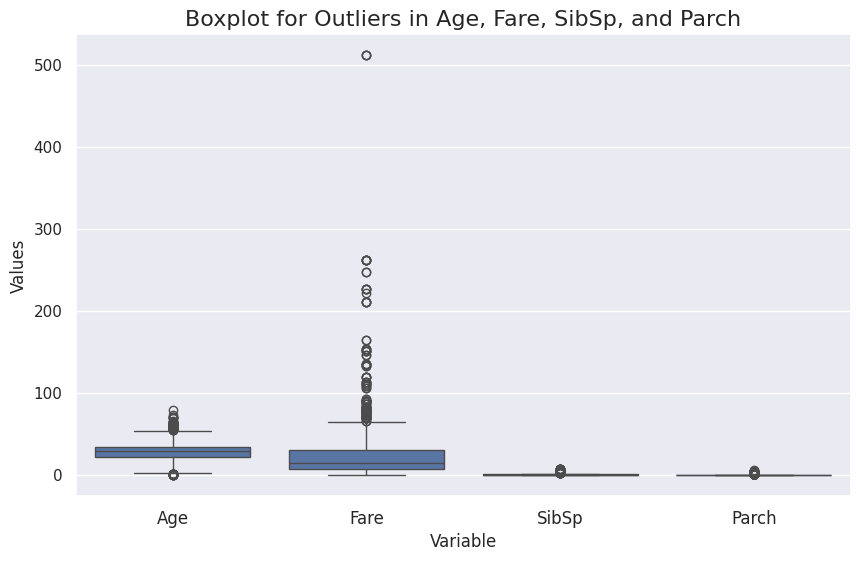

In [30]:
columns_to_plot = ['Age', 'Fare', 'SibSp', 'Parch']

melted_data = titanic_data[columns_to_plot].melt(var_name='Variable', value_name='Value')

#boxpolt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=melted_data)
plt.title('Boxplot for Outliers in Age, Fare, SibSp, and Parch', fontsize=16)
plt.ylabel('Values', fontsize=12)
plt.xticks(fontsize=12)
plt.show()

There's some outliers in 'Fare' and 'Age' columns that need to be dealt with

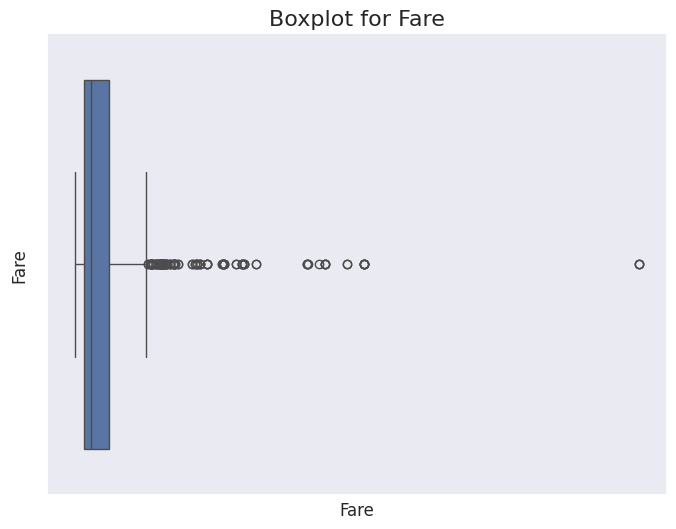

In [31]:
plt.figure(figsize=(8, 6))

sns.boxplot(x = titanic_data['Fare'])
plt.title('Boxplot for Fare', fontsize=16)
plt.ylabel('Fare', fontsize=12)
plt.xticks([])
plt.show()

In [32]:
q1 = titanic_data['Fare'].quantile(0.25)
q3 = titanic_data['Fare'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_fare = titanic_data[(titanic_data['Fare'] < lower_bound) | (titanic_data['Fare'] > upper_bound)]
print(outliers_fare)
print(titanic_data['Fare'].mean())

     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name  Sex        Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
27                      Fortune, Mr. Charles Alexander    0  19.000000      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)    1  29.699118      1   
34                             Meyer, Mr. Edgar Joseph    0  28.000000      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)    1  49.000000      1   
..                                                 ...  .

Note the major discrepancy between the outlier values and the mean of 'Fair'

In [33]:
titanic_data['Fare'] = titanic_data['Fare'].clip(lower_bound, upper_bound)

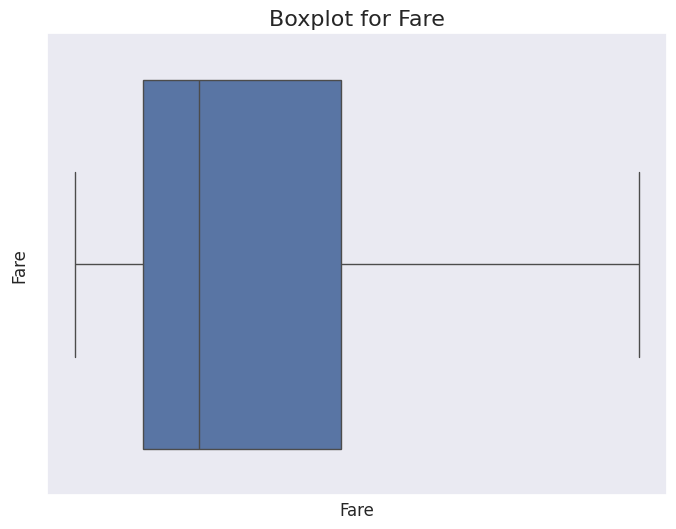

In [34]:
plt.figure(figsize=(8, 6))

sns.boxplot(x = titanic_data['Fare'])
plt.title('Boxplot for Fare', fontsize=16)
plt.ylabel('Fare', fontsize=12)
plt.xticks([])
plt.show()

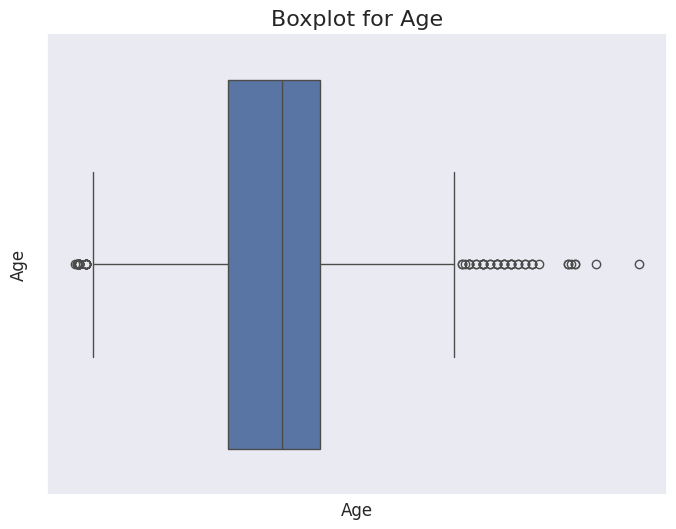

In [35]:
plt.figure(figsize=(8, 6))

sns.boxplot(x = titanic_data['Age'])
plt.title('Boxplot for Age', fontsize=16)
plt.ylabel('Age', fontsize=12)
plt.xticks([])
plt.show()

In [36]:
outliers_age = titanic_data[(titanic_data['Age'] < lower_bound) | (titanic_data['Age'] > upper_bound)]
print(outliers_age)
print(titanic_data['Age'].mean())

     PassengerId  Survived  Pclass                                  Name  Sex  \
33            34         0       2                 Wheadon, Mr. Edward H    0   
96            97         0       1             Goldschmidt, Mr. George B    0   
116          117         0       3                  Connors, Mr. Patrick    0   
493          494         0       1               Artagaveytia, Mr. Ramon    0   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson    0   
672          673         0       2           Mitchell, Mr. Henry Michael    0   
745          746         0       1          Crosby, Capt. Edward Gifford    0   
851          852         0       3                   Svensson, Mr. Johan    0   

      Age  SibSp  Parch      Ticket     Fare  Embarked  
33   66.0      0      0  C.A. 24579  10.5000         0  
96   71.0      0      0    PC 17754  34.6542         1  
116  70.5      0      0      370369   7.7500         2  
493  71.0      0      0    PC 17609  49.50

There are no cases where the age of the passenger stands out from the others by a ridiculous amount that might change the outcome of the prediction. So, in this case these are neutral outliers, so these values are not dealt with.

Besides, these are mostly elderly folks and therefore are necessary to consider.

Outliers have been clipped for more accurate learning.

# **Heatmap**

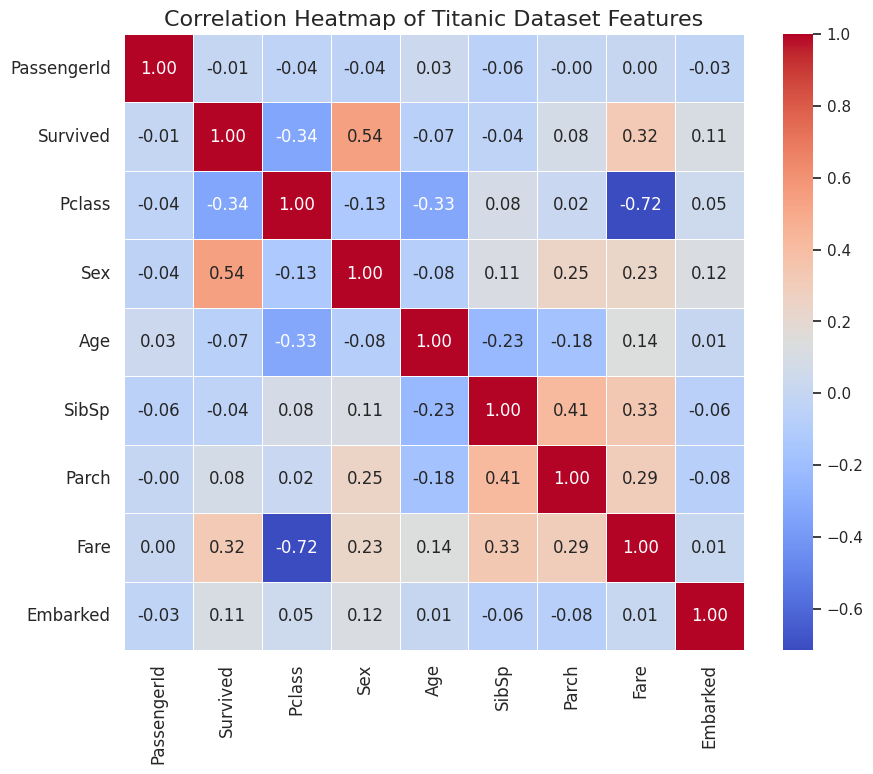

In [37]:
featuresCorr = titanic_data.select_dtypes(include=['number'])  #ignoring non-numeric columns

correlation_matrix = featuresCorr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Titanic Dataset Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


From the heatmap above, we can see that the feature that has the least correlation with 'Survived' is 'PassengerId', the others have decent correlation (both negative and positive) with the output.

The features that can be selected for training and testing the models are therefore  'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'.

Note: features that have non-numeric values ('Name', 'Ticket') are also avoided in this heatmap because the processing for models will be done using numeric values only.


# **Feature Scaling**

In [38]:
scaler = StandardScaler()

#numerical values need to be scaled for logistical regression
scale_columns = ['Age', 'Fare']

print(titanic_data[scale_columns].head(10))

         Age     Fare
0  22.000000   7.2500
1  38.000000  65.6344
2  26.000000   7.9250
3  35.000000  53.1000
4  35.000000   8.0500
5  29.699118   8.4583
6  54.000000  51.8625
7   2.000000  21.0750
8  27.000000  11.1333
9  14.000000  30.0708


In [39]:
titanic_data[scale_columns] = scaler.fit_transform(titanic_data[scale_columns])

In [40]:
print(titanic_data[scale_columns].head(10))

        Age      Fare
0 -0.592481 -0.820552
1  0.638789  2.031623
2 -0.284663 -0.787578
3  0.407926  1.419297
4  0.407926 -0.781471
5  0.000000 -0.761525
6  1.870059  1.358843
7 -2.131568 -0.145178
8 -0.207709 -0.630847
9 -1.208115  0.294282


Numerical values have been scaled for better predictions.

# **Dataset Splitting**

In [41]:
X = titanic_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1) #dropping less correlated and non-numeric columns
Y = titanic_data['Survived']

In [42]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0 -0.592481      1      0 -0.820552         0
1         1    1  0.638789      1      0  2.031623         1
2         3    1 -0.284663      0      0 -0.787578         0
3         1    1  0.407926      1      0  1.419297         0
4         3    0  0.407926      0      0 -0.781471         0
..      ...  ...       ...    ...    ...       ...       ...
886       2    0 -0.207709      0      0 -0.539655         0
887       1    1 -0.823344      0      0  0.290823         0
888       3    1  0.000000      1      2 -0.029155         0
889       1    0 -0.284663      0      0  0.290823         1
890       3    0  0.177063      0      0 -0.796127         2

[891 rows x 7 columns]


In [43]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


**Splitting Training Data and Testing Data**

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [45]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(891, 7)
(623, 7)
(268, 7)


# **Model Test**

Using the processed and feature engineered data, we now apply different ML models (Logistic Regression, Naive Bayes, Decision Tree Classifier) to see which model gives performs better by looking at the comparison between the accuracy scores and also Precision and recall comparison and Confusion Matrix for each models

**Logistic Regression Model**

In [46]:
model1 = LogisticRegression()

In [47]:
model1.fit(X_train, Y_train)
#accuracy of training data
X_train_prediction1 = model1.predict(X_train)
training_data_accuracy  = accuracy_score(Y_train, X_train_prediction1)
print('Accuracy score of training data in Logistic Regression model:', training_data_accuracy)
#accuracy score on test data
X_test_prediction1 = model1.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction1)
print('Accuracy score of test data in Logistic Regression model:', test_data_accuracy)
#confusion matrix
conf_matrix1 = confusion_matrix(Y_test, X_test_prediction1)
print('Confusion Matrix of Logistic Regression Model:\n', conf_matrix1)
#classification report
report1 = classification_report(Y_train, X_train_prediction1)
print('Classification Report of Logistic Regression Model:\n', report1)

Accuracy score of training data in Logistic Regression model: 0.8057784911717496
Accuracy score of test data in Logistic Regression model: 0.7910447761194029
Confusion Matrix of Logistic Regression Model:
 [[141  19]
 [ 37  71]]
Classification Report of Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       389
           1       0.76      0.71      0.73       234

    accuracy                           0.81       623
   macro avg       0.79      0.79      0.79       623
weighted avg       0.80      0.81      0.80       623



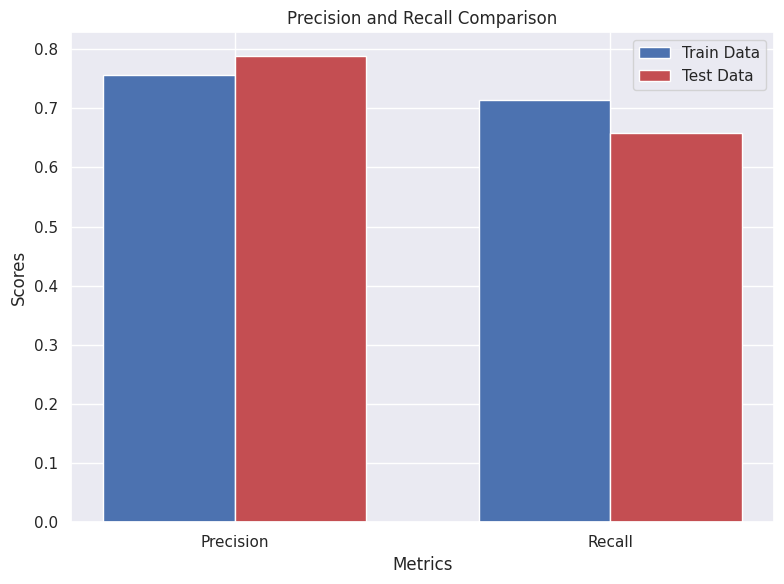

In [48]:
#precision & recall comparison
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

#for training data
precision_train = precision_score(Y_train, X_train_prediction1, average='binary')  # Adjust `average` for multiclass if needed
recall_train = recall_score(Y_train, X_train_prediction1, average='binary')

#for test data
precision_test = precision_score(Y_test, X_test_prediction1, average='binary')
recall_test = recall_score(Y_test, X_test_prediction1, average='binary')


labels = ['Precision', 'Recall']
train_values = [precision_train, recall_train]
test_values = [precision_test, recall_test]

x = range(len(labels))


fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
ax.bar(x, train_values, bar_width, label='Train Data', color='b')
ax.bar([p + bar_width for p in x], test_values, bar_width, label='Test Data', color='r')


ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall Comparison')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()


plt.tight_layout()
plt.show()

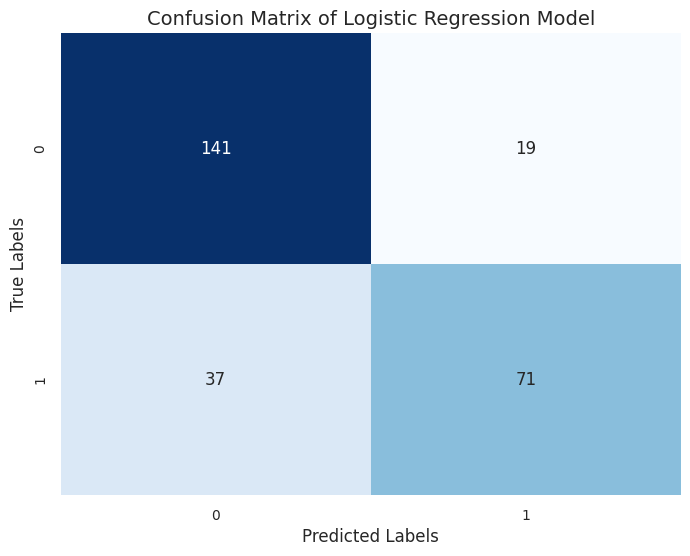

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Logistic Regression Model', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Naive Bayes Model**

In [50]:
model2 = GaussianNB()

In [51]:
model2.fit(X_train, Y_train)
#accuracy of training data
X_train_prediction2 = model2.predict(X_train)
training_data_accuracy  = accuracy_score(Y_train, X_train_prediction2)
print('Accuracy score of training data in Naive Bayes model:', training_data_accuracy)
#accuracy score on test data
X_test_prediction2 = model2.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction2)
print('Accuracy score of test data in Naive Bayes model:', test_data_accuracy)
#confusion matrix
conf_matrix2 = confusion_matrix(Y_test, X_test_prediction2)
print('Confusion Matrix of Naive Bayes Model:\n', conf_matrix2)
#classification report
report2 = classification_report(Y_train, X_train_prediction2)
print('Classification Report of Naive Bayes Model:\n', report2)

Accuracy score of training data in Naive Bayes model: 0.7656500802568218
Accuracy score of test data in Naive Bayes model: 0.7723880597014925
Confusion Matrix of Naive Bayes Model:
 [[131  29]
 [ 32  76]]
Classification Report of Naive Bayes Model:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       389
           1       0.67      0.76      0.71       234

    accuracy                           0.77       623
   macro avg       0.75      0.76      0.76       623
weighted avg       0.77      0.77      0.77       623



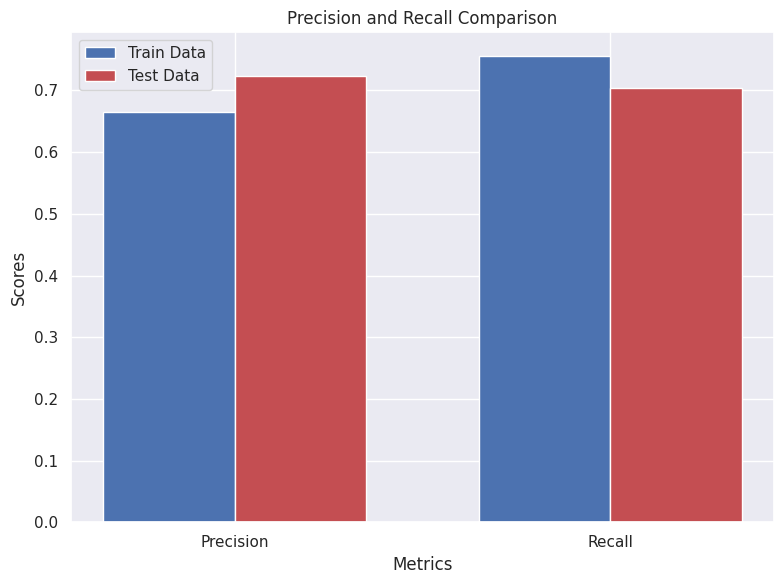

In [52]:
#precision & recall comparison
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

#for training data
precision_train = precision_score(Y_train, X_train_prediction2, average='binary')  # Adjust `average` for multiclass if needed
recall_train = recall_score(Y_train, X_train_prediction2, average='binary')

#for test data
precision_test = precision_score(Y_test, X_test_prediction2, average='binary')
recall_test = recall_score(Y_test, X_test_prediction2, average='binary')


labels = ['Precision', 'Recall']
train_values = [precision_train, recall_train]
test_values = [precision_test, recall_test]

x = range(len(labels))


fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
ax.bar(x, train_values, bar_width, label='Train Data', color='b')
ax.bar([p + bar_width for p in x], test_values, bar_width, label='Test Data', color='r')


ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall Comparison')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()


plt.tight_layout()
plt.show()

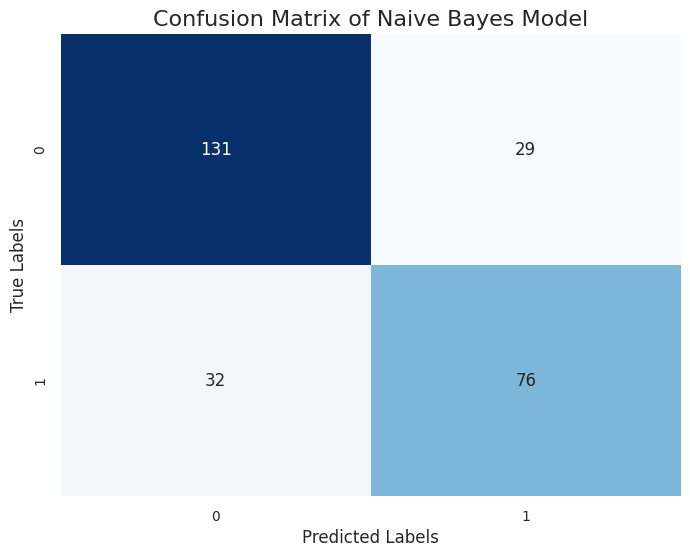

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Naive Bayes Model', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Decision Tree Classifier Model**

In [54]:
model3 = DecisionTreeClassifier()

In [55]:
model3.fit(X_train, Y_train)
#accuracy of training data
X_train_prediction3 = model3.predict(X_train)
training_data_accuracy  = accuracy_score(Y_train, X_train_prediction3)
print('Accuracy score of training data in Decision Tree Classifier model:', training_data_accuracy)
#accuracy score on test data
X_test_prediction3 = model3.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction3)
print('Accuracy score of test data in Decision Tree Classifier model:', test_data_accuracy)
#confusion matrix
conf_matrix3 = confusion_matrix(Y_test, X_test_prediction3)
print('Confusion Matrix of Decision Tree Classifier Model:\n', conf_matrix3)
#classification report
report3 = classification_report(Y_train, X_train_prediction3)
print('Classification Report of Decision Tree Classifier Model:\n', report3)

Accuracy score of training data in Decision Tree Classifier model: 0.9887640449438202
Accuracy score of test data in Decision Tree Classifier model: 0.7723880597014925
Confusion Matrix of Decision Tree Classifier Model:
 [[134  26]
 [ 35  73]]
Classification Report of Decision Tree Classifier Model:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       389
           1       1.00      0.97      0.98       234

    accuracy                           0.99       623
   macro avg       0.99      0.99      0.99       623
weighted avg       0.99      0.99      0.99       623



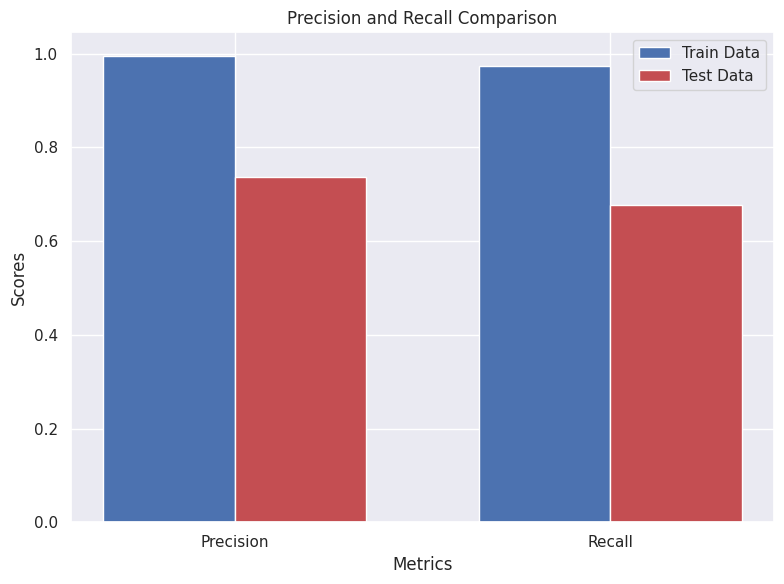

In [56]:
#precision & recall comparison
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

#for training data
precision_train = precision_score(Y_train, X_train_prediction3, average='binary')  # Adjust `average` for multiclass if needed
recall_train = recall_score(Y_train, X_train_prediction3, average='binary')

#for test data
precision_test = precision_score(Y_test, X_test_prediction3, average='binary')
recall_test = recall_score(Y_test, X_test_prediction3, average='binary')


labels = ['Precision', 'Recall']
train_values = [precision_train, recall_train]
test_values = [precision_test, recall_test]

x = range(len(labels))


fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
ax.bar(x, train_values, bar_width, label='Train Data', color='b')
ax.bar([p + bar_width for p in x], test_values, bar_width, label='Test Data', color='r')


ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall Comparison')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()


plt.tight_layout()
plt.show()

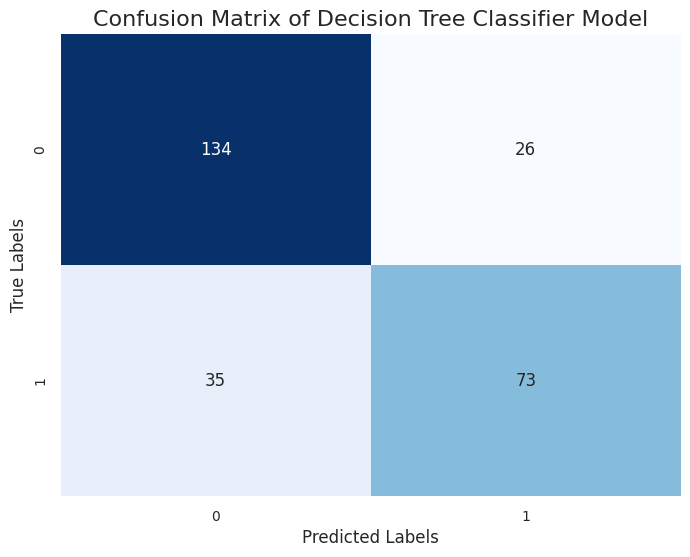

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Decision Tree Classifier Model', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# **Comparison between Models**

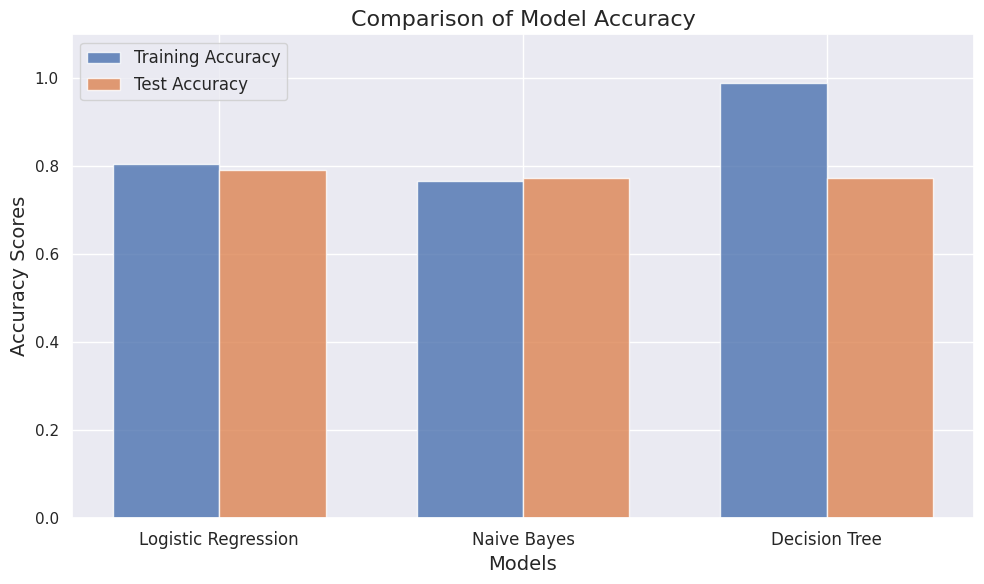

In [58]:
import matplotlib.pyplot as plt

#Accuracy scores for training and test data
training_accuracies = [
    accuracy_score(Y_train, X_train_prediction1),  #Logistic Regression
    accuracy_score(Y_train, X_train_prediction2),  #Naive Bayes
    accuracy_score(Y_train, X_train_prediction3),  #Decision Tree Classifier
]

test_accuracies = [
    accuracy_score(Y_test, X_test_prediction1),  #Logistic Regression
    accuracy_score(Y_test, X_test_prediction2),  #Naive Bayes
    accuracy_score(Y_test, X_test_prediction3),  #Decision Tree Classifier
]

models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree']

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, training_accuracies, bar_width, label='Training Accuracy', alpha=0.8)
plt.bar([i + bar_width for i in index], test_accuracies, bar_width, label='Test Accuracy', alpha=0.8)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Scores', fontsize=14)
plt.title('Comparison of Model Accuracy', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], models, fontsize=12)
plt.legend(fontsize=12)
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()